In [2]:
!nvidia-smi

Tue Jan 05 14:33:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 451.67       Driver Version: 451.67       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1050   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8    N/A /  N/A |     77MiB /  4096MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Please install GPU version of TF


In [2]:
tf.test.gpu_device_name()

''

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [4]:
tf.__version__

'2.2.0'

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'D:\ineuron intelligence files\archive\Cotton Disease\train'
valid_path = r'D:\ineuron intelligence files\archive\Cotton Disease\test'

In [7]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [8]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [9]:
folders = glob(r'D:\ineuron intelligence files\archive\Cotton Disease\train/*')

In [10]:
folders

['D:\\ineuron intelligence files\\archive\\Cotton Disease\\train\\diseased cotton leaf',
 'D:\\ineuron intelligence files\\archive\\Cotton Disease\\train\\diseased cotton plant',
 'D:\\ineuron intelligence files\\archive\\Cotton Disease\\train\\fresh cotton leaf',
 'D:\\ineuron intelligence files\\archive\\Cotton Disease\\train\\fresh cotton plant']

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'D:\ineuron intelligence files\archive\Cotton Disease\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory(r'D:\ineuron intelligence files\archive\Cotton Disease\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

61/61 [==============================] - 264s 4s/step - loss: 0.3076 - accuracy: 0.8903 - val_loss: 0.2244 - val_accuracy: 0.9434


In [23]:
!pip install matplotlib

  Using cached matplotlib-3.3.3-cp36-cp36m-win_amd64.whl (8.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-win_amd64.whl (51 kB)


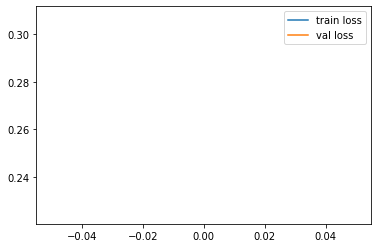

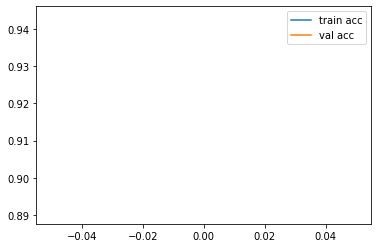

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [25]:
y_pred = model.predict(test_set)


In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([2, 2, 1, 3, 2, 2, 3, 1, 3, 0, 3, 3, 3, 3, 0, 2, 2, 0, 3, 2, 2, 0,
       3, 3, 3, 0, 2, 1, 3, 3, 1, 2, 1, 2, 1, 1, 0, 1, 2, 3, 2, 2, 0, 2,
       1, 3, 1, 3, 0, 3, 2, 0, 3, 3, 1, 3, 3, 0, 2, 0, 1, 2, 0, 2, 1, 1,
       3, 2, 3, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 3, 2, 0, 2, 0, 0, 3, 2,
       0, 1, 3, 3, 3, 1, 1, 1, 0, 3, 0, 1, 1, 0, 2, 2, 2, 0], dtype=int64)

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('D:\\ineuron intelligence files\\archive\\Cotton Disease\\test\\fresh cotton leaf\\d (7)_iaip.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [30]:
a= np.argmax(model.predict(test_image),axis=1)

In [31]:
a

array([2], dtype=int64)

In [32]:
result

array([[1.6558215e-04, 3.1674812e-08, 9.9983418e-01, 1.8472241e-07]],
      dtype=float32)

In [33]:
result = result.ravel() 

In [34]:
len(result)

4

In [35]:
result=result.tolist() 


In [36]:
#for index
N = 0
for num in range(len(result)) :
    if result[num] > N :
        N = result[num]
print(result.index(N))

2


In [37]:

result1=["diseased_leaf","diseased_plant","freash_leaf","freash_plant"]
max = result[0];
i = 0;    
     
#Loop through the array    
for index, value in enumerate(result):    
    #Compare elements of array with max    
    if(value > max):    
        max = value;    
        i = index   
print("Largest element present in given array: " + str(max) +" And it belongs to " +str(result1[i]) +" class.");

Largest element present in given array: 0.9998341798782349 And it belongs to freash_leaf class.


In [38]:
#experiment
#training_set.class_indices
result1=["diseased_leaf","diseased_plant","freash_leaf","freash_plant"]

max = result[0];
i = 0;    
     
#Loop through the array    
for index, value in enumerate(result):    
    #Compare elements of array with max    
    if(value > max):    
        max = value;    
        i = index  
        print(str(result1[i]))

freash_leaf
